# **UrbanSound8K 🎵**

### EDA, FEATURE ENGINEERING & SELECTION

In [109]:
# import libraries
import os
import glob
import utils
import config
import random
import numpy 
import pickle as pkl
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from playsound import playsound
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [59]:
#import dataset
pwd = os.getcwd()
data = pd.read_csv(os.path.join(pwd, config.CSV_FILE_PATH))
df = data.copy()
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


The dataset contains the meta-data about the audio files. which include the audio file names, the unique classes it belongs to, the audio ID from its original extracted [source](www.freesound.org), The slice time (start and end) from the original audio file recording, as well as the folder where the audio resides.   

In [60]:
# unique classes
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

The list above shows the unique classes of the audio files contained in the dataset

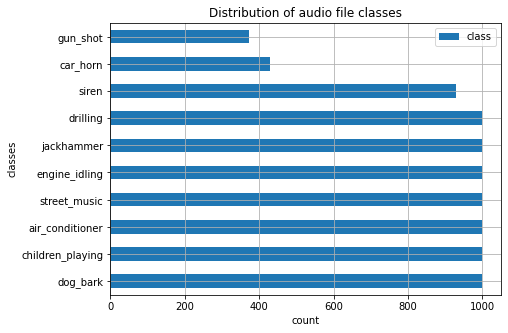

In [61]:
# check for imbalance in distibution audio classes
plt.figure(figsize=(7,5))
df['class'].value_counts().plot(kind='barh')
plt.grid(True)
plt.legend()
plt.title('Distribution of audio file classes')
plt.xlabel('count')
plt.ylabel('classes')
plt.show()

the distribution of the unique audio classes seem to be quite alright except the `gun_shot ` and `car_horn ` class which has less samples compared to the rest of the classes

In [62]:
# record length of all the 'audio files
df[['start', 'end']].head(5)

,start,end
0,0.0,0.317551
1,58.5,62.500000
2,60.5,64.500000
3,63.0,67.000000
4,68.5,72.500000


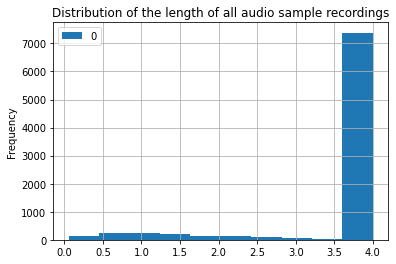

The average length range of each audio recording time present in the dataset is 3.6 secs to 4.0 secs


In [63]:
pd.DataFrame(df['end'] - df['start']).plot(kind='hist')
plt.grid(True)
plt.legend()
plt.title('Distribution of the length of all audio sample recordings')
plt.show()

print(f'The average length range of each audio recording time present in the dataset is {np.round(np.mean(df["end"] - df["start"]), 1)} secs to 4.0 secs')

In [64]:
# unique classes 
audio_classes = [ 'air_conditioner', 'car_horn', 
'children_playing', 'dog_bark', 'drilling', 
'engine_idling', 'gun_shot', 'jackhammer', 
'siren', 'street_music']

In [65]:
# audio file save format: format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav  

55013-3-0-1.wav 3


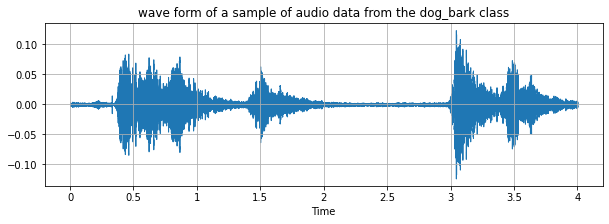

Audio data descriptive statistics
sample rate: 22050
min-value: -0.1017981767654419
max-value: 0.12388116866350174
std: 0.013407384976744652
mean: -5.746517928173489e-08
median: -6.3652778408140875e-06
skew: 0.06913702518325641
kurtosis: 8.700363573819457

 

Statictics for MFCC extract
min-value: -452.76751708984375
max-value: 155.8433837890625
std: 75.51673889160156
mean: -10.59296989440918
median: -2.1481428146362305
skew: -4.750195027556321
kurtosis: 26.97711160352949
54976-4-1-0.wav 4


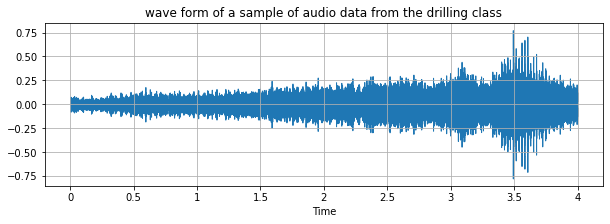

Audio data descriptive statistics
sample rate: 22050
min-value: -0.5020153522491455
max-value: 0.7750375270843506
std: 0.07847920805215836
mean: -2.0032211978104897e-05
median: 9.991596743930131e-05
skew: 0.12307647212962342
kurtosis: 3.0766397325470622

 

Statictics for MFCC extract
min-value: -148.55245971679688
max-value: 153.75067138671875
std: 36.05507278442383
mean: -1.5959876775741577
median: -1.7292649745941162
skew: 0.19454017469470813
kurtosis: 12.790327215677062
169044-2-0-25.wav 2


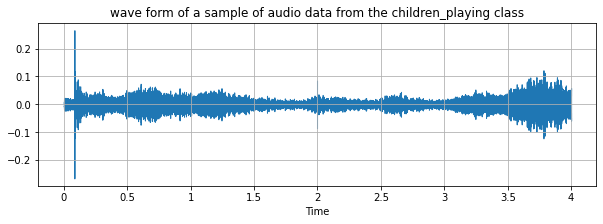

Audio data descriptive statistics
sample rate: 22050
min-value: -0.11982806026935577
max-value: 0.2668614983558655
std: 0.015442164614796638
mean: -1.746091220411472e-05
median: 9.21846367418766e-06
skew: 0.039200759101312
kurtosis: 4.2466347853073385

 

Statictics for MFCC extract
min-value: -311.1176452636719
max-value: 124.40027618408203
std: 53.66766357421875
mean: -4.580796241760254
median: 0.7838287353515625
skew: -4.318181473136618
kurtosis: 24.454561530736434
184805-0-0-51.wav 0


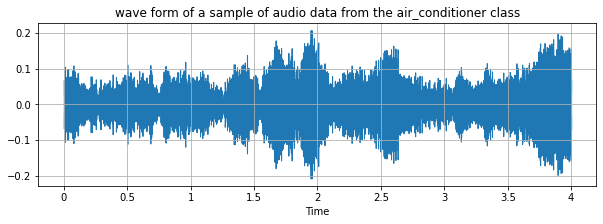

Audio data descriptive statistics
sample rate: 22050
min-value: -0.20750604569911957
max-value: 0.19798967242240906
std: 0.05177595466375351
mean: -0.0017833098536357284
median: -0.0021674050949513912
skew: 0.05365846966290429
kurtosis: 0.5662295542009561

 

Statictics for MFCC extract
min-value: -308.5035705566406
max-value: 162.81260681152344
std: 55.464996337890625
mean: -4.002708911895752
median: -2.1645493507385254
skew: -3.4492865284681753
kurtosis: 21.7588797130204
60605-9-0-73.wav 9


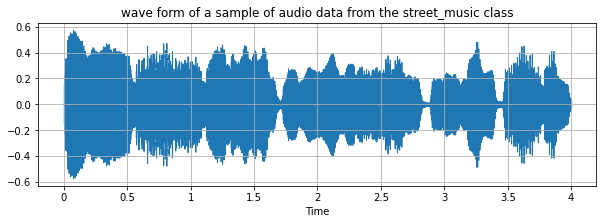

Audio data descriptive statistics
sample rate: 22050
min-value: -0.5738842487335205
max-value: 0.47559675574302673
std: 0.13694240152835846
mean: -4.866153540206142e-05
median: -0.0006436670082621276
skew: -0.05907630918413154
kurtosis: 0.22404348722616696

 

Statictics for MFCC extract
min-value: -329.09698486328125
max-value: 203.60931396484375
std: 61.74760055541992
mean: -4.856379508972168
median: -0.7869783639907837
skew: -2.6580185319372047
kurtosis: 19.258032922259346
89443-9-0-1.wav 9


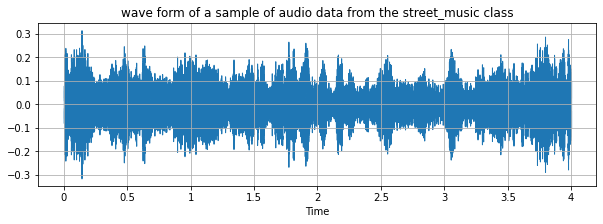

Audio data descriptive statistics
sample rate: 22050
min-value: -0.31629592180252075
max-value: 0.25915417075157166
std: 0.06051497161388397
mean: 4.009644271718571e-06
median: -2.16063745028805e-06
skew: -0.024677288755360377
kurtosis: 0.6285096500610763

 

Statictics for MFCC extract
min-value: -187.88352966308594
max-value: 131.47012329101562
std: 36.404029846191406
mean: -10.614115715026855
median: -7.806958198547363
skew: -1.4035912494593816
kurtosis: 16.86034135240603
193394-3-0-11.wav 3


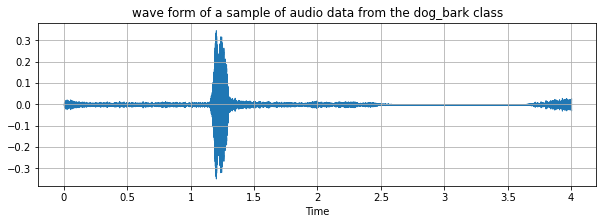

Audio data descriptive statistics
sample rate: 22050
min-value: -0.3216736316680908
max-value: 0.3487711548805237
std: 0.02171640656888485
mean: 4.6569170081056654e-05
median: 2.234001456047352e-10
skew: -0.36305266575046274
kurtosis: 79.99101144882151

 

Statictics for MFCC extract
min-value: -479.5111999511719
max-value: 93.60935974121094
std: 76.7618179321289
mean: -9.331720352172852
median: -0.8374264240264893
skew: -5.68187891963262
kurtosis: 32.27099261842998
61250-3-0-47.wav 3


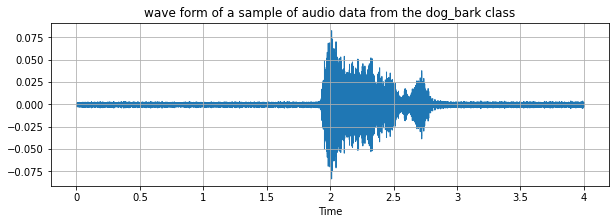

Audio data descriptive statistics
sample rate: 22050
min-value: -0.08307772874832153
max-value: 0.06966167688369751
std: 0.007007005158811808
mean: -0.001299067516811192
median: -0.0012994006974622607
skew: -0.09558440281681654
kurtosis: 18.117544615680963

 

Statictics for MFCC extract
min-value: -542.00927734375
max-value: 144.01077270507812
std: 88.21627807617188
mean: -9.72638988494873
median: 0.6237884759902954
skew: -5.357690069410048
kurtosis: 30.368007240288122
9674-1-0-1.wav 1


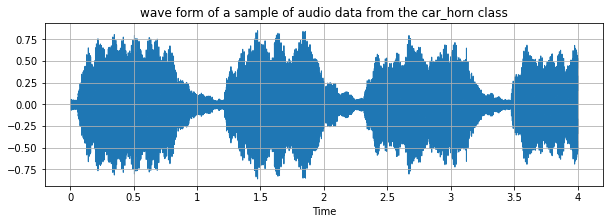

Audio data descriptive statistics
sample rate: 22050
min-value: -0.8441638350486755
max-value: 0.8524946570396423
std: 0.18744216859340668
mean: -0.0001825279468903318
median: -0.0006525950157083571
skew: 0.07339137232118423
kurtosis: 1.0773867462350921

 

Statictics for MFCC extract
min-value: -132.6489715576172
max-value: 50.518333435058594
std: 27.643413543701172
mean: -4.522995948791504
median: -2.3644728660583496
skew: -2.358250564509627
kurtosis: 9.540854812739136
203929-7-4-12.wav 7


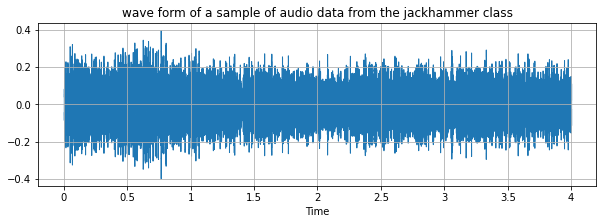

Audio data descriptive statistics
sample rate: 22050
min-value: -0.32916051149368286
max-value: 0.39670872688293457
std: 0.08166666328907013
mean: -0.0001109109798562713
median: -3.2335407013306394e-05
skew: 0.03250867309600024
kurtosis: 0.2658212353963654

 

Statictics for MFCC extract
min-value: -143.24789428710938
max-value: 170.01760864257812
std: 36.741641998291016
mean: -1.5922999382019043
median: -1.8666507005691528
skew: 1.1015344895605208
kurtosis: 14.471849556980903


In [66]:
# trying out 10 random audio samples from random classes
for i in range(0,10):
      random_folder = f'fold{random.choice(range(1,10))}'
      random_file = random.choice(os.listdir(config.AUDIO_FILES_PATH +'/'+ random_folder))
      class_file = int(random_file.split('-')[1])
      audio_file = os.path.join(random_folder,random_file)

      print(random_file,class_file)

      #display frequency 
      plt.figure(figsize=(10,3))
      sample_audio = os.path.join(config.AUDIO_FILES_PATH, audio_file)
      audio_data, sample_rate = librosa.load(sample_audio)
      librosa.display.waveshow(audio_data,sample_rate)
      plt.title(f'wave form of a sample of audio data from the {audio_classes[class_file]} class')
      plt.grid(True)
      plt.show()

      # some descriptive stats on raw and normalised audio data 
      print(f'Audio data descriptive statistics')
      print(f'sample rate: {sample_rate}')
      print(f'min-value: {np.min(audio_data)}')
      print(f'max-value: {np.max(audio_data)}')
      print(f'std: {np.std(audio_data)}')
      print(f'mean: {np.mean(audio_data)}')
      print(f'median: {np.median(audio_data)}')
      print(f'skew: {skew(audio_data)}')
      print(f'kurtosis: {kurtosis(audio_data)}')


      print('\n \n')
      # Mel-Frequency extract stats
      mfcc = librosa.feature.mfcc(y=audio_data,
                              sr=sample_rate,
                              n_mfcc=config.N_DIMS)
      mfcc = np.mean(mfcc.T, axis=0) # normalize the MFCC values

      print(f'Statictics for MFCC extract')
      print(f'min-value: {np.min(mfcc)}')
      print(f'max-value: {np.max(mfcc)}')
      print(f'std: {np.std(mfcc)}')
      print(f'mean: {np.mean(mfcc)}')
      print(f'median: {np.median(mfcc)}')
      print(f'skew: {skew(mfcc)}')
      print(f'kurtosis: {kurtosis(mfcc)}')

      # play audio
      playsound(sample_audio)

In [67]:
# check frequency cepstrums of similar classes
# choosing the dog_bark class with a class ID of 3
dog_bark = df[df['class'] == 'dog_bark']
dog_bark = dog_bark[['slice_file_name','fold','classID']].sample(5)
dog_bark

,slice_file_name,fold,classID
5276,203440-3-0-0.wav,1,3
6402,4201-3-1-0.wav,2,3
1226,128891-3-0-4.wav,6,3
836,116484-3-0-8.wav,4,3
1565,138015-3-0-5.wav,1,3


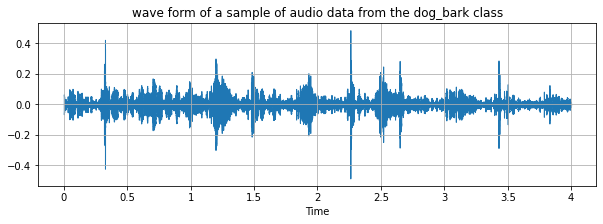

sample rate: 22050
min-value: -0.48439648747444153
max-value: 0.4211122393608093
std: 0.041976746171712875
mean: -0.00021936338453087956
median: 0.001058543217368424
skew: -0.1855595226333216
kurtosis: 3.1038156841509466

 

Statictics for MFCC extract
min-value: -305.9776916503906
max-value: 143.07237243652344
std: 53.67842102050781
mean: -0.7683590054512024
median: 3.274740219116211
skew: -4.111793871540664
kurtosis: 24.419429843211766


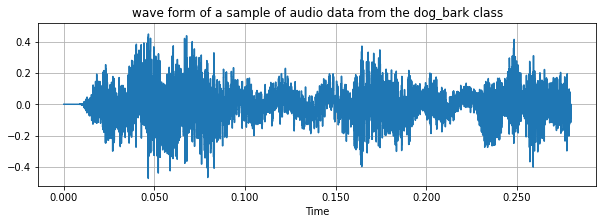

sample rate: 22050
min-value: -0.47301778197288513
max-value: 0.44773799180984497
std: 0.1102924570441246
mean: -0.000771165476180613
median: 4.6070235839579254e-06
skew: -0.08286602522981516
kurtosis: 1.0729863011869414

 

Statictics for MFCC extract
min-value: -138.34722900390625
max-value: 72.38352966308594
std: 27.388742446899414
mean: 1.75284743309021
median: 3.9779701232910156
skew: -3.0015481611550188
kurtosis: 15.450673860181947


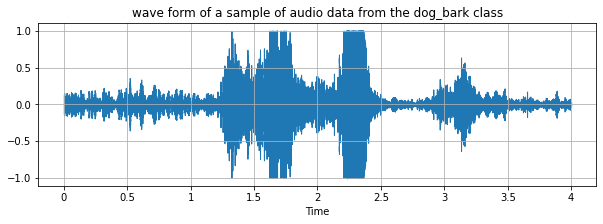

sample rate: 22050
min-value: -1.0072475671768188
max-value: 1.01010262966156
std: 0.20838849246501923
mean: -0.000677145435474813
median: -0.004035281948745251
skew: 0.042945686561850493
kurtosis: 7.938497906350577

 

Statictics for MFCC extract
min-value: -235.69277954101562
max-value: 133.07351684570312
std: 43.55549240112305
mean: 0.5911466479301453
median: 1.0454422235488892
skew: -3.2633699448480975
kurtosis: 20.813675958285078


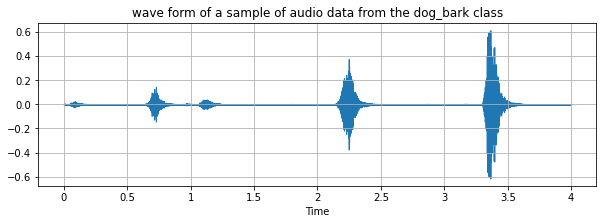

sample rate: 22050
min-value: -0.6124802231788635
max-value: 0.5887487530708313
std: 0.03276783227920532
mean: -2.6188112315139733e-05
median: -5.739707557950169e-05
skew: -0.07936032708768409
kurtosis: 73.77974808699486

 

Statictics for MFCC extract
min-value: -509.9707336425781
max-value: 75.1854248046875
std: 81.03614807128906
mean: -9.731828689575195
median: 1.4127955436706543
skew: -5.848959537144422
kurtosis: 33.33299787506262


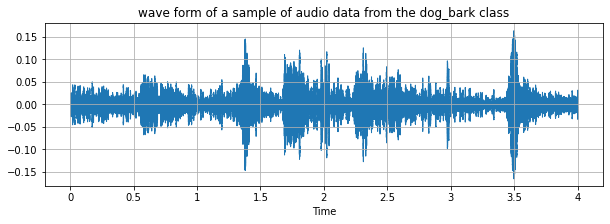

sample rate: 22050
min-value: -0.16466009616851807
max-value: 0.15154218673706055
std: 0.02379845455288887
mean: -1.330136728938669e-05
median: 0.0002796589978970587
skew: -0.047954217719615555
kurtosis: 4.468422177047147

 

Statictics for MFCC extract
min-value: -366.8630676269531
max-value: 126.47418975830078
std: 62.15003204345703
mean: -1.8945198059082031
median: 1.9683692455291748
skew: -4.831490491363653
kurtosis: 27.19007868582688


In [68]:
file_name = list(dog_bark.slice_file_name)
folder = list(dog_bark.fold)

for filename, fold in zip(file_name, folder):
      audio_file = os.path.join(f'fold{str(fold)}',filename)

      plt.figure(figsize=(10,3))
      sample_audio = os.path.join(config.AUDIO_FILES_PATH,audio_file)
      audio_data, sample_rate = librosa.load(sample_audio)
      librosa.display.waveshow(audio_data,sample_rate)
      plt.title(f'wave form of a sample of audio data from the {audio_classes[3]} class')
      plt.grid(True)
      plt.show()

      print(f'sample rate: {sample_rate}')
      print(f'min-value: {np.min(audio_data)}')
      print(f'max-value: {np.max(audio_data)}')
      print(f'std: {np.std(audio_data)}')
      print(f'mean: {np.mean(audio_data)}')
      print(f'median: {np.median(audio_data)}')
      print(f'skew: {skew(audio_data)}')
      print(f'kurtosis: {kurtosis(audio_data)}')

      print('\n \n')

      # Mel-Frequency extract stats
      mfcc = librosa.feature.mfcc(y=audio_data,
                              sr=sample_rate,
                              n_mfcc=config.N_DIMS)
      mfcc = np.mean(mfcc.T, axis=0) # normalize the MFCC values

      print(f'Statictics for MFCC extract')
      print(f'min-value: {np.min(mfcc)}')
      print(f'max-value: {np.max(mfcc)}')
      print(f'std: {np.std(mfcc)}')
      print(f'mean: {np.mean(mfcc)}')
      print(f'median: {np.median(mfcc)}')
      print(f'skew: {skew(mfcc)}')
      print(f'kurtosis: {kurtosis(mfcc)}')


      # play audio
      playsound(sample_audio)

In [69]:
# dataset from new audio folders location
folders_labels = []
audio_paths = []

dirs = os.listdir(config.SAVE_PATH)
for dir in dirs:
      audios = os.listdir(os.path.join(config.SAVE_PATH, dir))
      for audio in audios:
            audio_paths.append(os.path.join(config.SAVE_PATH, dir) + '/' + audio)
            folders_labels.append(dir)

In [70]:
audio_df = pd.DataFrame({'Audio-path':audio_paths, 'label':folders_labels})
audio_df

,Audio-path,label
0,dataset/car_horn/7389-1-1-0.wav,car_horn
1,dataset/car_horn/72259-1-9-5.wav,car_horn
2,dataset/car_horn/183894-1-8-0.wav,car_horn
3,dataset/car_horn/43802-1-1-0.wav,car_horn
4,dataset/car_horn/94868-1-0-0.wav,car_horn
...,...,...
8727,dataset/drilling/39532-4-1-0.wav,drilling
8728,dataset/drilling/151005-4-0-0.wav,drilling
8729,dataset/drilling/58005-4-0-32.wav,drilling
8730,dataset/drilling/77751-4-0-1.wav,drilling


In [71]:
min_value_lst = []
max_value_lst = []
std_lst = []
mean_lst = []
median_lst = []
skew_lst = []
kurtosis_lst = []

In [72]:
# extract features
feature_extract = []

audio_paths = list(audio_df['Audio-path'])
for audio, count in zip(audio_paths, range(len(audio_paths))):
      features = utils.extract_features(audio)
      feature_extract.append(features) 

      # MFCC Stats data 
      min_value_lst.append(np.min(features))
      max_value_lst.append(np.max(features))
      std_lst.append(np.std(features))
      mean_lst.append(np.mean(features))
      median_lst.append(np.median(features))
      skew_lst.append(skew(features))
      kurtosis_lst.append(kurtosis(features))

      print(f'done for audio {count}')



done for audio 0
done for audio 1
done for audio 2
done for audio 3
done for audio 4
done for audio 5
done for audio 6
done for audio 7
done for audio 8
done for audio 9
done for audio 10
done for audio 11
done for audio 12
done for audio 13
done for audio 14
done for audio 15
done for audio 16
done for audio 17
done for audio 18
done for audio 19
done for audio 20
done for audio 21
done for audio 22
done for audio 23
done for audio 24
done for audio 25
done for audio 26
done for audio 27
done for audio 28
done for audio 29
done for audio 30
done for audio 31
done for audio 32
done for audio 33
done for audio 34
done for audio 35
done for audio 36
done for audio 37
done for audio 38
done for audio 39
done for audio 40
done for audio 41
done for audio 42
done for audio 43
done for audio 44
done for audio 45
done for audio 46
done for audio 47
done for audio 48
done for audio 49
done for audio 50
done for audio 51
done for audio 52
done for audio 53
done for audio 54
done for audio 55
do

In [103]:
print(len(feature_extract))

# dataf = pd.DataFrame({'feature_extract':feature_extract})
# dataf
audio_df['MFCC-features'] = feature_extract
display(audio_df.head(5))

audio_df.to_csv(config.EXTRACTED_FEATURE_SAVE_PATH)

8732


,label,MFCC-features
0,car_horn,"[-121.55058, 65.45534, -32.427902, 34.492073, ..."
1,car_horn,"[-126.84716, 115.87754, -55.64741, 42.58142, -..."
2,car_horn,"[-252.9698, 167.19125, -39.19234, 4.9301143, -..."
3,car_horn,"[-132.8113, 55.07116, -1.1111865, 34.076862, 2..."
4,car_horn,"[-264.63226, -33.122623, -17.734629, 40.243603..."


In [104]:
X = np.array(audio_df['MFCC-features'].tolist())
y = np.array(audio_df['label'].tolist())

In [125]:
# save data
with open(config.PICKLE_SAVE_PATHS + 'Xvalues', 'wb') as f:
      pkl.dump(X, f)
with open(config.PICKLE_SAVE_PATHS + 'yvalues', 'wb') as f:
      pkl.dump(y, f)

In [75]:
mfcc_data = pd.DataFrame({'min_value':min_value_lst, 'max_value':max_value_lst, 'std':std_lst,
                         'mean':mean_lst, 'median':median_lst, 'skew':skew_lst, 'kurtosis':kurtosis_lst})

mfcc_data = mfcc_data.assign(labels=audio_df['label'])
mfcc_data

,min_value,max_value,std,mean,median,skew,kurtosis,labels
0,-121.550583,65.455338,24.580328,-2.251909,-0.704169,-2.281909,12.540225,car_horn
1,-126.847160,115.877541,31.312759,-0.769311,0.445877,-0.430298,8.797351,car_horn
2,-252.969803,167.191254,48.798847,-2.647705,0.021331,-2.326509,17.988012,car_horn
3,-132.811295,55.071159,26.491137,1.429906,2.026098,-2.966784,14.084645,car_horn
4,-264.632263,40.243603,45.578289,-8.555743,-3.226343,-4.335254,22.043105,car_horn
...,...,...,...,...,...,...,...,...
8727,-122.167442,27.085032,26.897406,-4.094758,3.500185,-2.720750,8.080559,drilling
8728,-133.940567,35.603207,24.261259,-3.582786,0.624641,-3.836582,18.226357,drilling
8729,-64.242607,43.882713,15.808039,-1.686942,-1.641500,-0.835131,5.579684,drilling
8730,-178.893692,154.043915,38.440590,-1.373351,-2.573030,-0.785039,15.074829,drilling


In [120]:
mfcc_data.to_csv(config.EXTRACTED_MFCC_FEATURE_SAVE_PATH)